In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

0.1%

100.0%


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



102.8%


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



100.0%


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



112.7%

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw




c:\Users\JourneyMage_2\PycharmProjects\3x+1\venv\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [9]:
output = net(X)

In [11]:
output

tensor([[-2.3322, -2.3901, -2.2432, -2.3585, -2.2187, -2.3349, -2.2721, -2.3956,
         -2.3209, -2.1836]], grad_fn=<LogSoftmaxBackward>)

In [18]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a bacth of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0010, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.0491, grad_fn=<NllLossBackward>)


In [19]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X. y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy:", correct/total)

Accuracy: 1.0


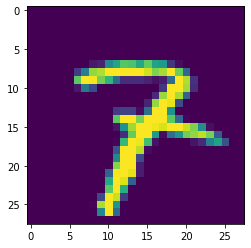

In [25]:
import matplotlib.pyplot as plt
plt.imshow(X[9].view(28,28))
plt.show()

In [26]:
print(torch.argmax(net(X[9].view(-1,784))[0]))

tensor(7)
